In [1]:
# 利用数组进行数据处理
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
points = np.arange(-5, 5, 2) # 1000个间隔相等的点
xs, ys = np.meshgrid(points, points) # 产生两个二维矩阵
print(xs) # xs每一行对应points
print(ys) # ys每一列对应points

[[-5 -3 -1  1  3]
 [-5 -3 -1  1  3]
 [-5 -3 -1  1  3]
 [-5 -3 -1  1  3]
 [-5 -3 -1  1  3]]
[[-5 -5 -5 -5 -5]
 [-3 -3 -3 -3 -3]
 [-1 -1 -1 -1 -1]
 [ 1  1  1  1  1]
 [ 3  3  3  3  3]]


In [3]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  5.83095189,  5.09901951,  5.09901951,  5.83095189],
       [ 5.83095189,  4.24264069,  3.16227766,  3.16227766,  4.24264069],
       [ 5.09901951,  3.16227766,  1.41421356,  1.41421356,  3.16227766],
       [ 5.09901951,  3.16227766,  1.41421356,  1.41421356,  3.16227766],
       [ 5.83095189,  4.24264069,  3.16227766,  3.16227766,  4.24264069]])

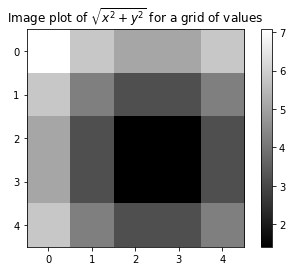

In [4]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar() # 用颜色代表x/y轴对应点的值，以后学matplotlib再详细讲解。

In [5]:
# 将条件逻辑表述为数组运算

In [6]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)] # 根据cond决定取值
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [7]:
result = np.where(cond, xarr, yarr) # 前面的做法只适用于一维数组，where则更通用。
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [8]:
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2, -2],
       [-2,  2,  2,  2],
       [-2, -2,  2, -2],
       [-2,  2, -2, -2]])

In [9]:
np.where(arr > 0, 2, arr) # 只对正值处理

array([[ 2.        , -2.42433276,  2.        , -0.05655187],
       [-1.05119426,  2.        ,  2.        ,  2.        ],
       [-0.19063612, -0.2075412 ,  2.        , -0.40575162],
       [-0.81511827,  2.        , -1.00482085, -0.29014986]])

In [10]:
cond1 = np.array([True, False, False, True])
cond2 = np.array([True, True, False, False])
np.where(cond1 & cond2,
         0,
         np.where(cond1,
                  1,
                  np.where(cond2, 2, 3)))
# 从最内层where展开，如果cond2为True，取2，否则取3。
# 对于cond1，如果cond1为True，取1。否则cond1为False，cond2为True取2，都为False取3。
# 继续叠加。。。
# 建议先写if-else再用where优化。

array([0, 2, 3, 1])

In [11]:
# 数学和统计方法

In [12]:
arr = np.random.randn(5, 4) # 正态分布的数据
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum()) # 所有数字加起来
print(arr.mean(axis=1)) # 对每一行求平均
print(arr.sum(0)) # 对每一列求和

[[-0.60642898 -0.71536577  1.62634848 -1.53876013]
 [ 1.59465797 -1.69712896  0.64345977  0.02692956]
 [-1.05746591  0.19955349  0.53481112  0.84087373]
 [ 1.35288362 -0.53339505 -0.25475596  1.96991622]
 [-0.75848892 -1.23247927  0.29068937  1.57295488]]
0.112940462058
0.112940462058
2.25880924115
[-0.3085516   0.14197958  0.12944311  0.63366221 -0.03183099]
[ 0.52515777 -3.97881557  2.84055279  2.87191425]


In [13]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr.cumsum(0)) # 对每一列累加
print(arr.cumprod(1)) # 对每一行累乘

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


In [14]:
# 基本数组统计方法
# sum
# mean
# std/var：      标准差和方差
# min/max
# argmin/argmax：分别为最小和最大元素的索引
# cumsum
# cumprod

In [15]:
# 用于布尔型数组的方法

In [16]:
arr = np.random.randn(100)
print((arr > 0).sum()) # 正数的数量
print((arr <= 0).sum())

49
51


In [17]:
bools = np.array([False, False, True, False])
print(bools.any()) # 是否有True（对于非布尔数组，非0就是True）
print(bools.all()) # 是否全部为True

True
False


In [18]:
# 排序

In [19]:
arr = np.random.randn(8)
arr.sort()
arr

array([-0.41053948, -0.33567028, -0.14980025,  0.12637499,  1.22385731,
        1.55645311,  2.50815208,  2.58220013])

In [20]:
arr = np.random.randn(5, 3)
arr.sort(1) # 对每行排序
arr

array([[-0.75839427, -0.59546501, -0.31912824],
       [-1.21207972, -1.10972785, -0.59829973],
       [-1.13229569, -0.07776177,  0.27082918],
       [-2.33452632, -0.20187988,  0.6254117 ],
       [-0.85581661,  0.11031514,  1.75206503]])

In [21]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5%分位数

-1.6516510631638368

In [22]:
# 唯一化以及其他的集合逻辑

In [23]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(sorted(set(names))) # 纯Python做法)
np.unique(names)

['Bob', 'Joe', 'Will']


array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [24]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [25]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6]) # 元素是否属于后面一个数组

array([ True, False, False,  True,  True, False,  True], dtype=bool)

In [26]:
# 数组的集合运算
# unique
# intersect1d：
# union1d
# in1d：       得到一个表示“x的元素是否包含于y”的布尔型数组
# setdiff1d
# setxor1d